# Notebook for playing with maths

### Install dependencies

### Draw logo

## Generate a Fibonacci sequence and plot the Fibonacci spiral

Found existing installation: PythonTurtle 0.3.2
Uninstalling PythonTurtle-0.3.2:
  Successfully uninstalled PythonTurtle-0.3.2


### Formula for Fibonacci sequence

In [26]:
%%latex
\begin{align}
& F(0)=0 \\
& F(1)=1) \\
& F(n) = F(n-1) + F(n-2)
\end{align}

<IPython.core.display.Latex object>

### Generate the sequence

In [20]:
# Function to generate sequence of fibonacci numbers
def fibonacci(length: int = 10) -> []:
    # Base case for F(0) and F(1)
    sequence=[0,1]
    
    # Calculate F(n) until n < desired length of sequence
    while len(sequence) < length:
        sequence.append(sequence[-1] + sequence[-2])
    
    # Return the sequence
    return sequence 

# Get first 50 numbers in sequence
sequence = fibonacci(length=50)
 
# Output
f"Sequence: len:{len(sequence)} min:{min(sequence)} max:{max(sequence)}"

'Sequence: len:50 min:0 max:7778742049'

### Plot squares and arcs to create the Fibonacci spiral

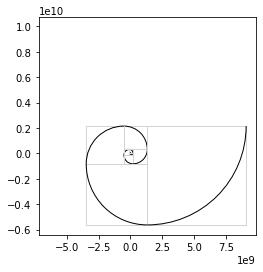

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arc

# Define Matplotlib figure and axis. This looks best on a square grid
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

# Squares will align to alternating sides of previous square.
aligns = ['right', 'top', 'left', 'bottom']

# Draw the squares and arcs joining the corners. First one at 0,0
x = 0
y = 0
arcangle = 0  # Start and end angles for arcs will be offest from this angle. Use 0 for simplicity.
   
for i in range(1, len(sequence)):   # Don't plot first square as it is of len 0
    # Calculate start pos of square from next align, center point for arc and start and end angles of the arc
    align = aligns[i % len(aligns)-1]

    if align == 'right':
        x = x + sequence[i-1]  # Left most position = right of last bottom (position of last bottom + it's length)
        arccenter = [x, y+sequence[i]] # Top left
        startangle = 270
        endangle = 360
    elif align == 'top':
        x = x - sequence[i-2] 
        y = y + sequence[i-1]
        arccenter = [x, y] # Bottom left
        startangle = 0
        endangle = 90
    elif align == 'left':
        x = x - sequence[i]
        y = y - sequence[i-2]
        arccenter = [x+sequence[i], y] # Bottom right
        startangle = 90
        endangle = 180
    elif align == 'bottom':
        y = y - sequence[i]
        arccenter = [x+sequence[i], y+sequence[i]] # Top right
        startangle = 180
        endangle = 270
            
    # Draw rectangle
    #print(f"Drawing rectangle of size {sequence[i]} at {x}:{y} to {align} of previous rectangle.")
    ax.add_patch(Rectangle((x, y), sequence[i], sequence[i], fill=False, color='lightgray'))
    
    # Draw the arc 
    #print(f"Drawing arc size {sequence[i] * 2} centered at {arccenter} with angle {arcangle}.")
    ax.add_patch(Arc(arccenter, sequence[i] * 2, sequence[i] * 2, arcangle, startangle, endangle))


# We have to plot something for matplot to render. it won't just rener patches. Plot an invisable + in the center.
ax.plot([-1, 1], [0, 0], color='white')
ax.plot([0, 0], [-1, 1], color='white')
#ax.plot(xplots, yplots)

#display plot
plt.show()
